# Puerta de Pauli-X (X)

### Explicación de la puerta

Es el equivalente al NOT clásico. Invierte el estado del qubit. Su representación matricial es: 


$$
X =\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$

### Circuito de la puerta con Qiskit y Matplot



Circuito con Pauli x:


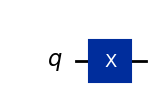

In [28]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

qc = QuantumCircuit(1)  
qc.x(0)


print("\nCircuito con Pauli x:")
qc.draw('mpl')

### Visualización de la esfera de Bloch

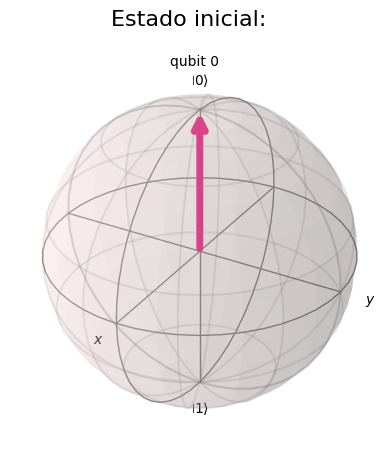

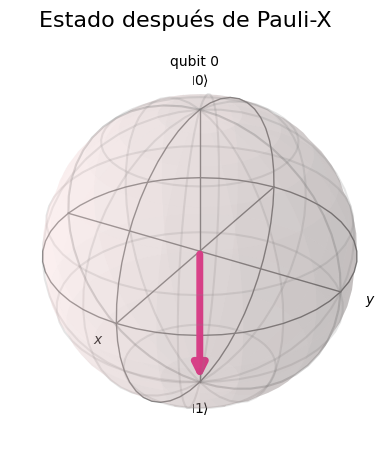

In [4]:
state_initial = Statevector.from_label('0')
state_after_x = Statevector.from_instruction(qc)


display(plot_bloch_multivector(state_initial, title = "Estado inicial:"))
plot_bloch_multivector(state_after_x, title = "Estado después de Pauli-X ")

### Ejecución del circuito tras 1024 shots


Contenido de result_stats: {'1': 1024}


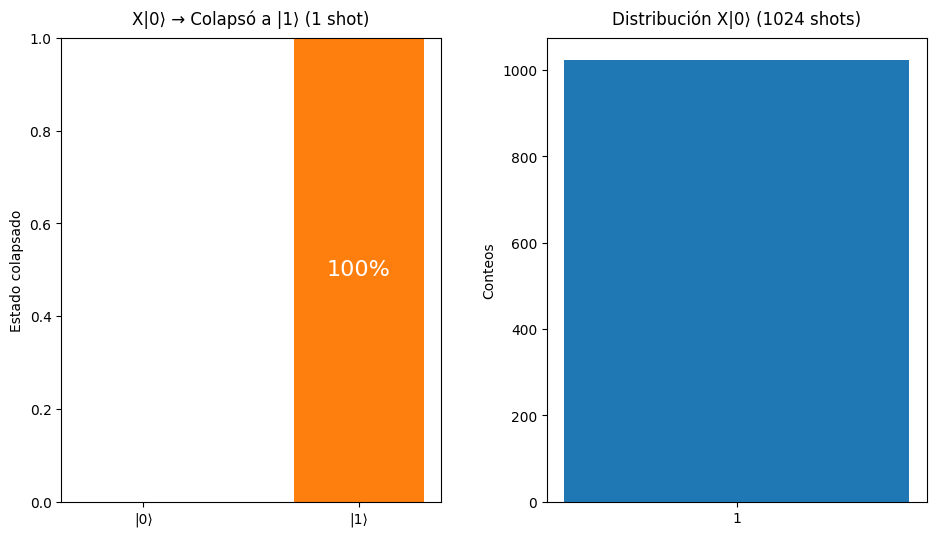

In [34]:
qc_measured = QuantumCircuit(1, 1)  
qc_measured.x(0) 
qc_measured.measure(0, 0) 

simulator = Aer.get_backend('qasm_simulator')

result = simulator.run(transpile(qc_measured, simulator), shots=1, memory=True).result()
colapsed_value = result.get_memory()[0]

result_stats = simulator.run(transpile(qc_measured, simulator), shots=1024).result().get_counts()


plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(['|0⟩', '|1⟩'], 
        [1 if colapsed_value == '0' else 0, 1 if colapsed_value == '1' else 0],
        color=['#1f77b4', '#ff7f0e'], width=0.6)
plt.title("X|0⟩ → Colapsó a |{}⟩ (1 shot)".format(colapsed_value), fontsize=12, pad=10)
plt.ylim(0, 1)
plt.ylabel("Estado colapsado")

for i, val in enumerate([colapsed_value == '0', colapsed_value == '1']):
    plt.text(i, 0.5, f"{100 if val else 0}%", 
             ha='center', va='center', fontsize=16, color='white')

print("Contenido de result_stats:", result_stats)

plt.subplot(1, 2, 2)
plt.bar(result_stats.keys(), result_stats.values(), color=['#1f77b4', '#ff7f0e'])
plt.title("Distribución X|0⟩ (1024 shots)", fontsize=12, pad=10)
plt.ylabel("Conteos")

plt.tight_layout(pad=3.0)


### Circuito con medición 


Circuito con medición


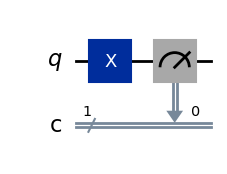

In [35]:
print("\nCircuito con medición")
qc_measured.draw('mpl')